<a href="https://colab.research.google.com/github/ILMNX/pattern-recognition/blob/main/audio-object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pydub

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
from pydub import AudioSegment

In [ ]:
audio = AudioSegment.from_file("audio.mp3")
audio.export("audio.wav", format="wav")

<_io.BufferedRandom name='audio.wav'>

In [ ]:
y, sr = librosa.load("audio.wav")

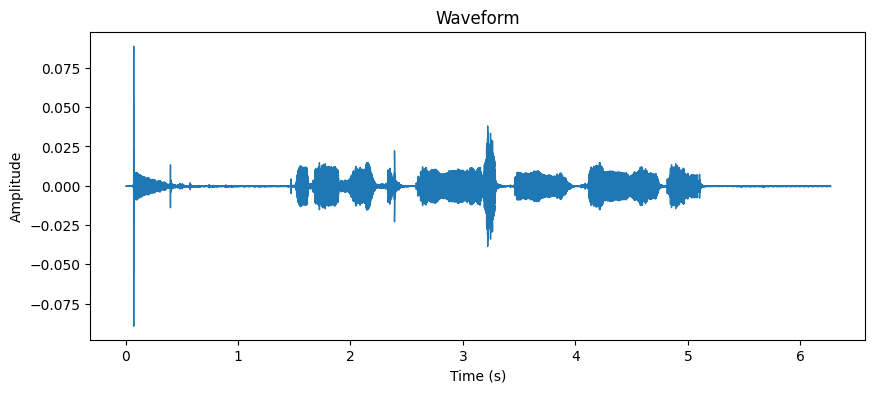

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
spectogram = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

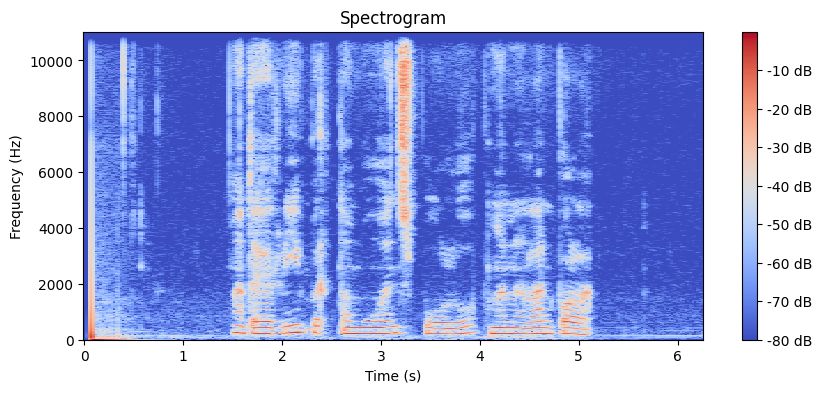

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectogram, sr=sr, x_axis='time', y_axis='hz', cmap='coolwarm')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [ ]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

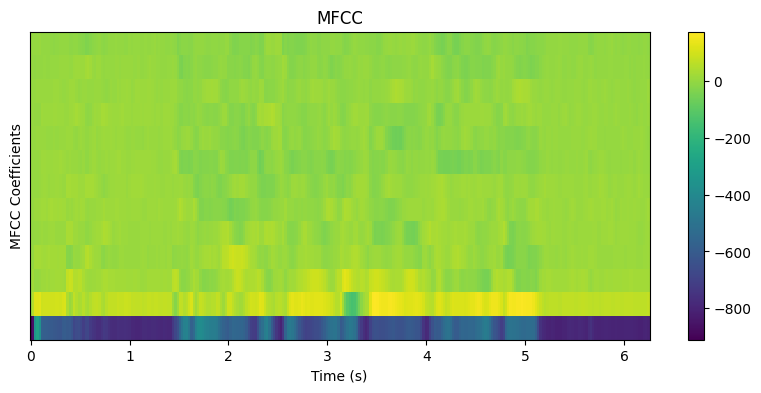

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap='viridis')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

In [ ]:
pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 49.2 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr

In [ ]:
audio_file = "audio.wav"

In [ ]:
recognizer = sr.Recognizer()

In [ ]:
with sr.AudioFile(audio_file) as source:
    audio_data = recognizer.record(source)

In [ ]:
try:
    text = recognizer.recognize_google(audio_data, language="id-ID")
    print("Recognized Text:")
    print(text)
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")

Recognized Text:
materi pertemuan 10 pengenalan pola


In [ ]:
pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.5 MB/s eta 0:00:00


In [ ]:
from jiwer import wer

In [ ]:
from logging import error
label = "materi pertemuan 10 pengenalan pola"

predicted_text = text

error = wer(label, predicted_text)
print(f"Word Error Rate (WER): {error}")

Word Error Rate (WER): 0.0


In [ ]:
accuracy = 1 - error
print(f"Akurasi: {accuracy:.2f}")

Akurasi: 1.00
